In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from import_housing_data import housing_full

### Take a Quick Look at the Data Structure

Start by looking at the top five rows of data using the DataFrame's head() method

In [2]:
housing_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. There are 10 attributes (longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population households, median_income, median_house_value and ocean_proximity)


**The info() method is useful to get quick description of the data, in particular the total number of rows, each attribute's type, and the number of non-null values:**

In [3]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by machine learning standards, but it's perfect to get started.<br>
You notice that the total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. You will need to take care of this later.

All attributes are numerical, except for ocean_proximity. Its type is object, so it could hold any kind of Python object. <br>
But since you loaded this data from a CSV file, you know that is must be a text attribute. When you looked at the top five rows, <br>
you probably noticed that the values in the ocean_proximity column where repetitive, which means that it is probably a categorical attribute. <br>
You can find out what categories exists and how many districts belong to each category by using the value_counts() method.

In [4]:
housing_full["ocean_proximity"].head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [5]:
housing_full["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Let's look at the other fields. The **describe()** method shows a summary of the numerical attributes

In [6]:
housing_full.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min and max rows are self-explanatory. Note that the null values are ignored (so for example, the count of total_bedrooms is 20.433, not 20,640).<br>
The std row shows <i>standard deviation<i>, which measures how dispersed the values are. <br>
The 25%, 50% and 75% rows show the corresponding <i>percentiles<i>: a **percentile** indicates the value below which a given percentage of observations in a group of observations fall.<br>
For example %25 of the districts have a **housing_median_age** lower than 18, while 50% are lower than 29, and 75% lower than 37.<br>
These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third quartile).

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute<br>
A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).<br>
You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset.<br>
It will plot a histogram for each numerical attribute

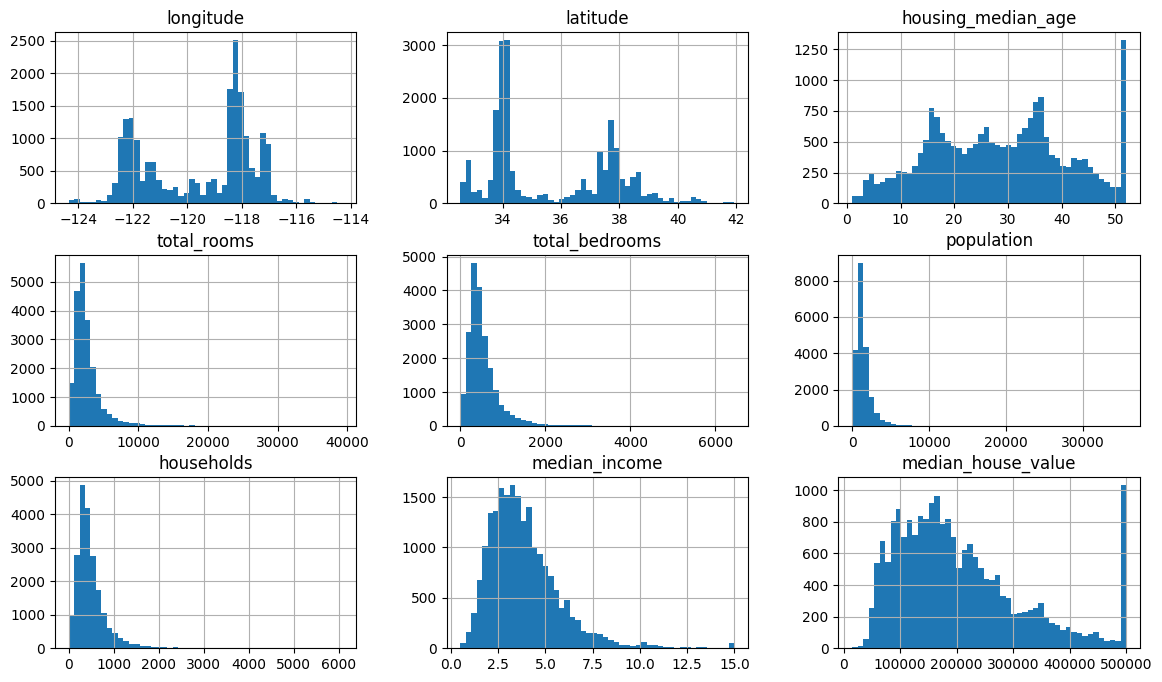

In [7]:
housing_full.hist(bins = 50, figsize = (14,8))
plt.show()

Looking at these histograms, you notice a few things:

- First, the median income attribute does not look like it is expressed in US dollars (USD). <br>After checking with the team that collected data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes.<br> The numbers represent roughly tens of thousand of dollars (e.g. 3 actually means about $30.000<br> Working with preprocessed attributes is common in machine learning, and it is not necessarily a problem, but you should try to understand how the data was computed.



- The housing median age and the median house value were also capped. The later may be a serious problem since it is your target attribute (your labels).<br> Your machine learning algorithms may learn that prices never go beyond that limit. <br> You need to check with your client team (the team that will use your system's output) to see if this is a problem or not.<br> If they tell you that they need precise predictions even beyond $500.00 then you have two options. <br> 1. Collect proper labels for districts whose labels were capped.<br>2. Remove those districts from the training set(and also from the test set, sincey our system should not be evaluated poorly if it predicts values beyond (USD)500.000).



- These attributes have very different scales. We will discuss this later in this chapter when we explore feature scaling.
- Finally, many histograms are <i>skewed right<i>: they extend much farther to the right of the median than to the left. This may make it a bit harder for some machine learning algorithms to detect patterns.<br>Layer, you'll try transforming these attributes to have more symmetrical and bell-shaped distributions.

Suppose you've chatted with some experts who told you that the median income is a very imporant attribute to a predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since te median income is a contrinous numerical attributes, you first need to create a income category attreibute.


In [8]:
housing_full["income_cat"] = pd.cut(housing_full["median_income"],
                                    bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels = [1,2,3,4,5])

# pd.cut()
# Use cut when you need to segment and sort data values into bins.
# This function is also useful for going from a continuous variable to a categorical variable.
# For example, cut could conver ages to groups of age ranges. Supports binning into an
# equal number ofb ins, or a pre-specified array of bins.



#### pd.cut() use in action

In [9]:
students_data = {'Student' : ["Selim","Paulina", "Mia"], 'Marks': [97,35, 56]}
sd_df = pd.DataFrame(students_data)

bins = [0, 50, 75, 100] # Ranges: 0-50, 51,75, 76-100
mark_categories = ["Low","Average","High"]

# Step 3: Use cut() to categorize the marks
sd_df["Category"] = pd.cut(sd_df["Marks"], bins = bins,labels = mark_categories, include_lowest=True)
sd_df

#Syntax
# pd.cut(x, bins, right=True, labels=None, retbins= False, precision = 3, include_lowest=False, duplicates = "raise")

# Parameters:
# x : The 1D input array to be binned.
# bins: defines the bin edges for segmentation
# right (default: True): If True, bins include the rightmost edge.
# Labels: Assigns labels to bins. If False, only integer indicators are returned.
# retbins (default = False): If True, returns the bin edges.

,Student,Marks,Category
0,Selim,97,High
1,Paulina,35,Low
2,Mia,56,Average


----

In [10]:
housing_full["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

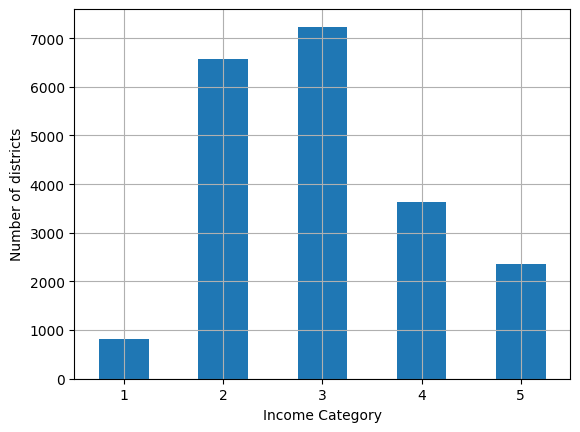

In [11]:
cat_counts = housing_full["income_cat"].value_counts().sort_index()
cat_counts.plot.bar(rot = 0, grid = True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

Now, you are ready to do stratified sampling based on the income category. Scikit-Learn provides a number of splitter classes in the sklearn.model_selection packager that implement various strategies to split your dataset into a training set and a test set. Each splitter has a split () method that returns an iterator over different training/test splits of the same data

To be precise, the split() method yields the training and test <i>indices</i> not the data itself. Having multiple splits can be useful if you want to better estimate the performance of your model, as you will see when the discuss cross-validation later in this chapter.

Since stratified sampling is fairly common, there's a shorter way to get a single split using the train_test_split() function with the stratify argument.



In [12]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(housing_full, test_size = 0.2, stratify=housing_full["income_cat"], random_state=42)
train, test = train_test_split(housing_full, test_size= 0.2, random_state=42)

Let's see if this worked as expected. You can start by looking at the income category proportions in the test set:

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [14]:
housing_full["income_cat"].value_counts() / len(housing_full)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

We won't use the **income_cat** column again, so you might as well drop it, reverting the data back to its original state:

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

## Explore and Visualize the Data to Gain Insights

Since we're going to experiment with various transformations of the full training set, we should make a copy of the original so we can revert to it afterwards.

In [16]:
housing = housing_full.copy()

### Visualizing Geographical Data

Because the dataset includes geographical information (latitude and longitude), it is a good dead to create a scatterplot of all the districts to visualize data.

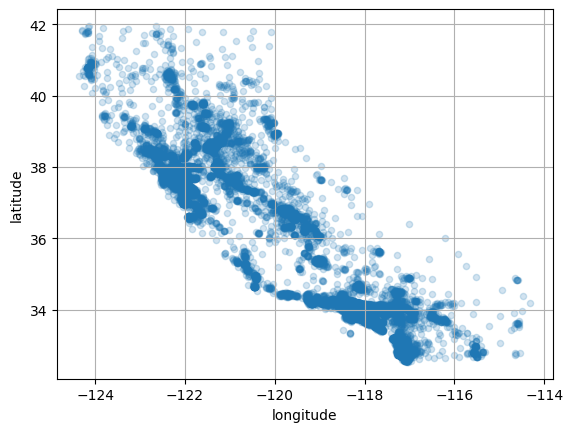

In [17]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, alpha = 0.2)
#Setting the alpha option to 0.2 makes it much easier to visualize the places where there is a high density of data points
plt.show()

The radius of each circle represents the district's population (option **s**), and the color represents the price (option **c**).<br>
Here you use a predefined color map (option cmap) called **jet**, which ranges from blue (low values) to red(high prices)

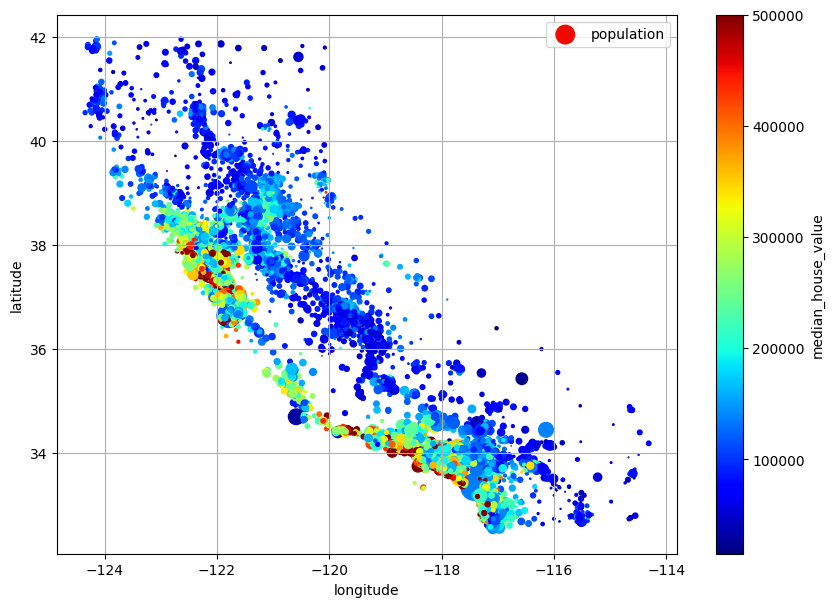

In [18]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, s= housing["population"] / 100, label = "population", c = "median_house_value",
             cmap = "jet", colorbar = "True", legend = True, sharex = False, figsize = (10,7))
plt.show()

## Look for Correlations

Since the dataset is not too large, we can easily compute the <i>standard correlation coefficient (also called Pearson's r)</i>. between every pair of numerical attributes using the corr() method.

In [19]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

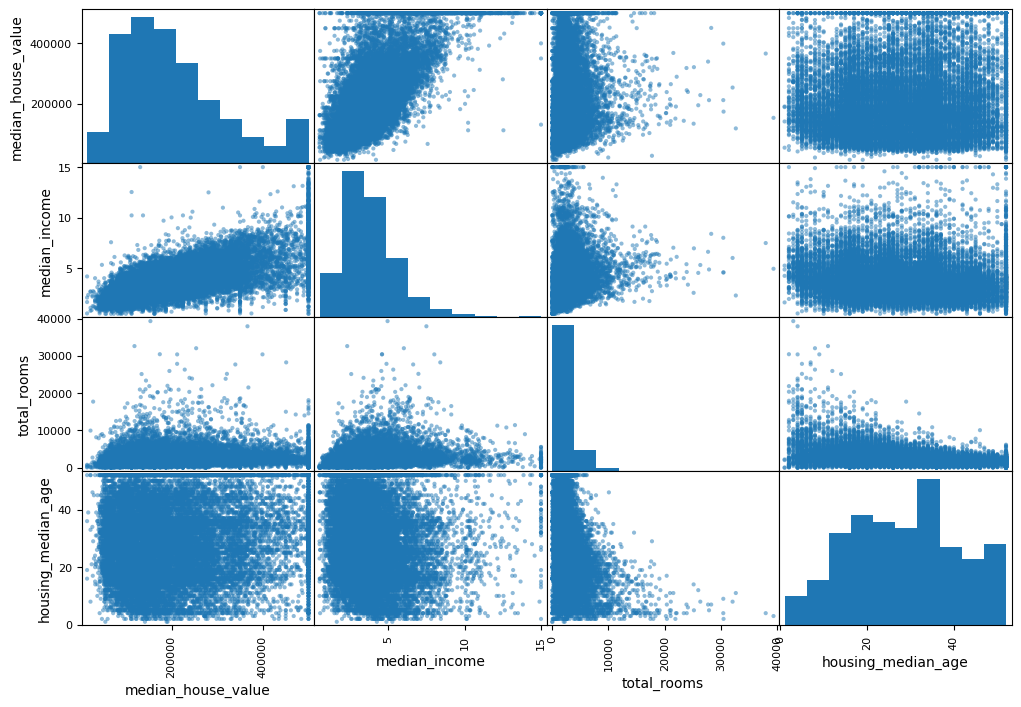

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

The main diagonal would be full of straight lines if Pandas plotted each variables against itself, which would not be very useful. So instead, the Pandas displays a histogram of each attribute (other options are available)

Looking at the correlation scatterplots, it seems like the most promising attribute to predict the median house value is the median income, so you zoom in on that scatter plot.

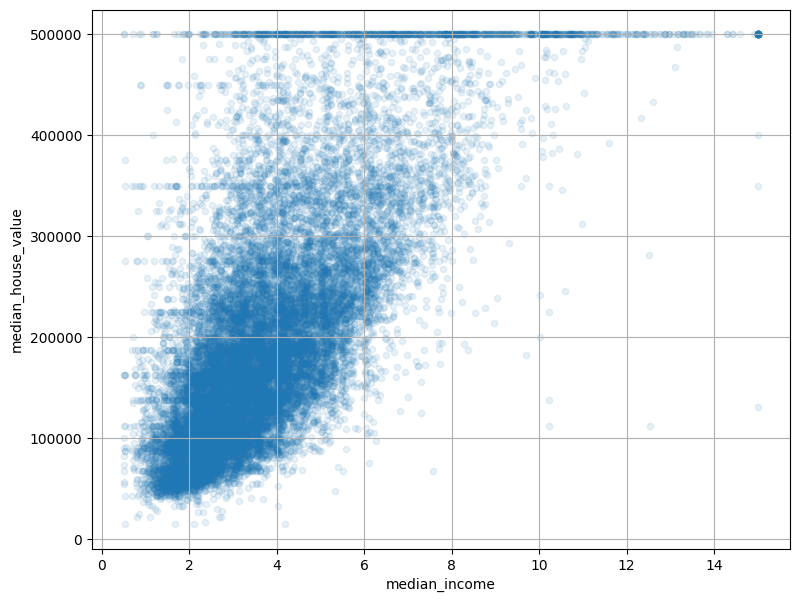

In [21]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1, figsize = (9,7), grid = True)
plt.show()

This plot reveals a few things, First, correlation is indeed quite strong; you ca clearly see the upward trend, although the data is noisy.<br>
Second, the price cap you noticed earlier is clearly visible as a horizontal line at 500.000. But the plot also reveals other less obvious straight lines: <br>
A horizontal line around 450,000, 350.000, 280.000 and a few more below that. You may want to try removing the corresponding district to prevent your algorithms from learning to reproduce these data quirks.


Note that the correlation coefficient only measures linear correlations (as x goes up, y generally goes up/down). It may completely miss out non-linear relationships (e.g. as x approaches 0, y generally goes up)

### EXPERIMENT WITH ATTRIBUTE COMBINATIONS

Hopefully the previous sections gave you an idea of a few ways you can explore the data and gain insights. You identifed a few data quirks that you may want to clean up before feeding the data to a machine learning algorithms, and you found interesting correlations between attributes, in particular with the target attribute. You also noticed that some attributes have a skewed-right distributions, so you mayu want to transform them (e.g. by computing their logarithmic or square root). Of course, your mileage will vary considerably with each project, but the general ideas are similar.

One last thing you may want to do before preparing the data for machine learning algorithms is to try out various attribute combinations.
For example, the total number of rooms in a district is not very useful if you don't know how many households there are. What you really want is the number of rooms per household. similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the total number of rooms. And the population per household also seems like an interesting attribute combination to look at.


In [22]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [23]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

Not bad! The new bedrooms_ratio attribute is much more correlated with the median house value than the total number of rooms or bedrooms. It's a strong **negative correlation**, so it looks like houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district-obviously the larger the houses, the more expensive they are.


When creating new combined features, make sure they are not too linearly correlated with existing features: <i>collinearity<i> can cause issues with some models, such as linear regression. In particular, avoid simple weighted sums of existing features.





# Prepare the Data For Machine Learning Algorithms

In [24]:
# Revert to a clean training set.
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

## Clean the Data

Most machine learning algorithms cannot work with missing features, so you'll need to take care of these. For example, you noticed earlier that the total_bedrooms attribute has some missing values. You have three options to fix this.

	- Get rid of the corresponding districts.
	- Get rid of the whole attribute.
	- Set the missing values to some value (zero, the mean, the median etc.) This is called imputation.


You can accomplish these easily using the Pandas DataFrame's dropna(), drop() and fillna() methods.

In [25]:
# option 1: housing.dropna(subset = ["total_bedrooms"] , inplace = True)
# option 2: housing.drop("total bedrooms", axis = 1, inplace = True)
# option 3:
# median = housing["total bedrooms"].median()
# housing["total bedrooms"] = housing["total bedrooms"].fillna(median)




You decide to go for option 3 since it is the least destructive, but instead of the preceding code, you will use a handy Scikit-Learn class SimpleImputer.
The benefit is that it will store the median value of each feature: this will make it possible to impute missing values not only on the training set,  but also on the validation set, the test set, and any new data fed to the model. To use it, first you need to create a SimpleImputer instance, specifying that you want to replace each attribute missing values with the median of that attribute.

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= "median")

housing_num = housing.select_dtypes(include = [np.number]) # Since the median can only be computed on numerical attributes, we have to take only numerical columns from our dataset.
imputer.fit(housing_num)
X = imputer.transform(housing_num)

Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matrices even when they are fed Pandas DataFrames as input. So, the output of imputer.transform(housing_num) is a NumPy array: X has neither column names nor index. Luckily, it's not to hard to wrap X in a DataFrame and recover the column names and index from housing num

In [27]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

### Handling Text and Categorical Attributes

So far we have only dealt with numerical attributes, but your data may also contain text attributes. In this dataset, there is just one: the ocean_proximity attribute.


In [28]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


It's not arbitary text: there are a limited number of possible values, each of which represents a category. So this attribute is a categorical attribute. Most machine learning algorithms prefer to work with numbers, so let's conver these categories from text to numbers. For this, we can use Scikit-Learn's OrdinalEncoder class:

In [29]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

You can get the list of categories using the categories_ instance variable. It is a list containing a 1D array of categories for each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute):

In [30]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g. for ordered categories such as 'Bad', 'Average' , 'Good' , 'Excellent'), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a cammon solution is to create one binary attribute per category: one attribute equal to 1 when the category is '<1H OCEAN' (and 0 otherwise), and so on.<br>
This is called **one-hot** encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors:

In [31]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

By default, the output of a OneHotEncoder is a SciPy sparse matrix, instead of a NumPy array

A sparse matrix is a very efficient representation for matrices that contain mostly zeros. Indeed, internally it only stores the nonzero values and their positions. When a categorical attribute has hundreds or thousands categories, one-hot encoding it results in a very large matrix full 0s except for a single 1 per row. In this case, a sparse matrix is exactly what we need. It will save plenty of memory and speed up computations. You can use a sparse matrix mostly like a normal 2D Array, but if you want to conver it to a (dense) NumPy aray, just call the toarray() method.



In [32]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Pandas has a function called get_dummies(), which also converts each categorical feature into a one-hot representation, with one binary feature per category.

In [33]:
df_test = pd.DataFrame({"ocean_proximity" : ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


It looks nice and simple, so why not use it instead of OneHotEncoder? Well, the advantage of OneHotEncoder is that it remembers which categories it was trained on. This is very important because once your model is in production, it should be fed exactly the same features as during training: no more, no less.

When you fit any Scikit-Learn estimator using a DataFrame, the estimator stores the column names in the feature_names_in_ attribute. Scikit-Learn then ensures that any DataFrame fed to this estimator after that (e.g. to transform() or predict()) has the same column name. Transformers also provide a get_feature_names_out() method that you can use to build a DataFrame around the transformer's output.

In [34]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [35]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

## Feature Scaling and Transformation

#### Min-Max Scaler (Normalization)

In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range = (-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

#### Standardization

In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

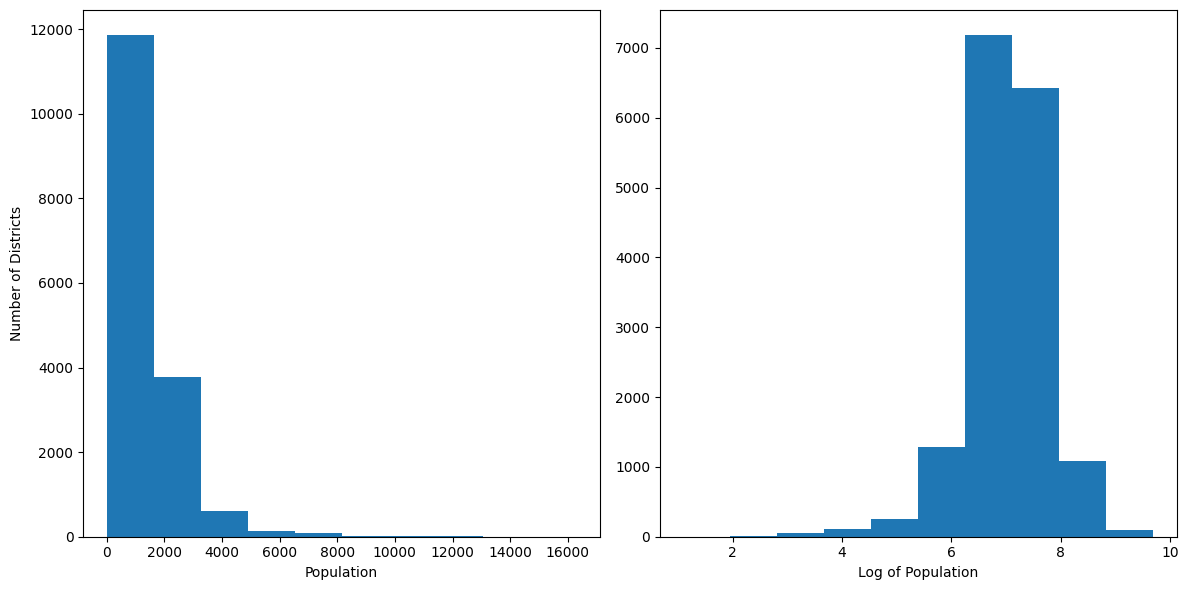

In [38]:
plt.figure(figsize=(12,6))

#Left plot
plt.subplot(1,2,1)
plt.hist(housing["population"])
plt.xlabel("Population")
plt.ylabel("Number of Districts")

#Right plot
plt.subplot(1,2,2)
plt.hist(np.log(housing["population"]))
plt.xlabel("Log of Population")

plt.tight_layout()



So far we've only looked at the input features, but the target values may also need to be transformed. For example, if the target distribution has a heavy tail, you may choose to replace the target with it's logarithm. Bu if you do, the regression model will not predict the log of the median house valie, not the median house value itself. You will need to computer the exponential of the model's prediction if you want the predicted median house value.

Luckily, most of scikit-learn's transformers have an inverse_transform() method, making it easy to computer inverse of their transformations.

Scaler's inverse_transform()


In [39]:
from sklearn.linear_model import LinearRegression
target_scalar = StandardScaler()
scaled_labels = target_scalar.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scalar.inverse_transform(scaled_predictions)

This works fine, but it's simple and less error-prone to use a TransformedTargetRegressor, avoiding potential scaling mismatches. We just need to construct it, giving it the regression model and the label transformer, then fit it on the training set, using the original unscaled labels. It will automatically use the transformer to scale the labels and train the regression model on the resulting scaled labels, just like we did previously. Then, when we want to make a prediction, it will call the regression model's predict() method and use the scaler's inverse_transform() method to produce the prediction

In [40]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer = StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

## Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order, Fortunately, scikit-learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for numerical attributes which will first impute then scale the input features.


from sklearn.pipeline improt Pipeline

num_pipeline = Pipeline([
	("impute", SimpleImputer(stategy = "median"),
	("standardize", StandardScaler()),
])



In [41]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

So far, we have handled the categorical columns and numerical columns separately. It would be more convenient to have single transformer capable of hanling all columns, applying the appropariate transformations to each column. For this, you can use a ColumnTransformer. For example, the following ColumnTransformer will apply num_ppeline (the one we just defined) to the numerical attributes, and cat_pipeline to the categorical attributes



In [42]:
from sklearn.compose import ColumnTransformer

num_attributes = ["longitude","latitude", "housing_median_age", "total_rooms","total_bedrooms","population", "households","median_income"]
cat_attributes = ["ocean_proximity"]


cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown  = "ignore"))


preprocessing = ColumnTransformer([
    ("num",num_pipeline, num_attributes),
    ("cat",cat_pipeline, cat_attributes)
])


First we import ColumnTransformer class, then we define the list of numerical and categorical column names and construct a simple pipeline for categorical attributes. Lastly, we construct a ColumnTransformer. Its constructor requires a list of triplets (3-tuples), each containing a name (which must be unique and not contain double underscores), a transformer, and a list of names (or indices) of columns that the transformer should be applied to.

Since listing all the column names is not very convenient, Scikit-learn provides a make_column_selector class that you can use to automatically select all the featues of a given type, such as numerical or categorical,. You can pass a selector to the ColumnTransformer instead of column names or indices.

In [43]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include= np.number)),
    (cat_pipeline, make_column_selector(dtype_include= object)),
)

# Now we're ready to apply this ColumnTransformer to the housing data.
housing_prepared = preprocessing.fit_transform(housing)



Great! We have a preprocesing pipeline that takes the entire training dataset and applies each transformer to the appropriate columnns, then concatenates the transformed columns horizontally (transformers must ever change the number of rows).<br>
Once again this returns a NumPy array, but you can get the column names using preprocessing.get_feature_names_out() and wrap the data in a nice DataFrame as we did before.

Our project is going really well and we're almost ready to train some models! You now want to create a single pipeline that will perform all the transformations we've experimented with up to now.

Let's recap what the pipeline will do and why

- Missing values in numerical features will imputed by replacing them with medians, as mot ML algorithm don't expect missing values. In categorical feature, missing values will be replaced by the most frequent category.
- The categorical feature will be one-hot encoded, as most ML Algorithms only accept numerical inputs.
- A few ratio features will be computed and added: bedrooms_ratio, rooms_per_house, and people_per_house. Hopefully these will better correlate with the median house value, and thereby help the ML models.
- A few cluster similarity features will also be added, These will likely be more useful to the model than latitude and longitude
- Features with a long tail will be replaced by their logarithm, as most models prefer features with roughly uniform or Gaussian distributions.
- All numerical features will be standardized, as most ML algorithms prefer when all featurs have roughly the same scale.





In [44]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [45]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import  make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age


In [46]:
housing_prepared = preprocessing.fit_transform(housing)

In [47]:
housing_prepared.shape

(16512, 24)

In [48]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# SELECT AND TRAIN A MODEL.

At last! You framed the problem, you go the data and explored it, you sampled a training set and a test set, and you wrote a preprocessing pipeline to automatically clean up and prepare your data for machine learning algorihtms. You are now ready to select and train a mahcine learning model.

### Train and Evaluate on the training set

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x168...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x169a46bd0>)])),
                ('linearregression', LinearRegression())])

In [50]:
housing_predictions = lin_reg.predict(housing)

In [51]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68972.88910758459

We're not using R2 Score coefficient of determination instead of the RMSE. This coefficient represents the ratio of the variance in the data that the model can explain: The close tor 1 (which is the max value) , the better. If the model simply predicts the mean all the time. It does not explain any part of variance. So the model's R2 score is 0. and if the model does oven worse than that, then its R2 score can be negative, and indeed arbitrarily low.

This is better than nothing, but clearly not a great score: the median_housing_values of most districts range between 120.000 and 265.000 USD, so a typical prediction error of 68.790 USD which is really not very satisfying. This is an example of a model **underfitting** the training data. When this happens, it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

As we saw in the previous chapter, the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, which rules out the last option. You could try to add more features, but first you want to try a more complex model to see how it does.

You decide to try a DecisionTreeRegressor, as this is farily powerful model capable of finding complex non-linear relationships in the data

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)

In [53]:
print(tree_rmse)

0.0


Wait, What? No error at all? Could this model really be absolutely perfect ? Of course, it is much more likley that the model has badly overfit the data. How can you be sure ? As we saw earlier, you don't want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for model validation.

## Better Evaluation Using Cross-Validation

One way to evaluate the decision tree model would be to use the train_test_split() function to split the training set into a smaller traiing set and a validation set, then train your models against the smaller training set and evaluate them against the validation set, It's a bit effort, but nothing too difficult, and it would work fairly well.


A great alternative is to use Scikit-Learn's k-fold cross-validation feature. You split the training set into k nonoverlapping subsets called folds, then you train and evaluate your model k times, picking a different fold for evaluation every time (i.e. the validation fold) and using the other k-1 folds for training. This process produces K evaluation scores.



k-fold cross-validation, with k = 10


Scikit-learn provides a convenient cross_val_score() function that does just that, and it returns an array containing the k evaluation scores. For example, Let's use it to evaluate our tree regressor, using k = 10:

from sklear.model_selection import cross_val_score


tree_rmses = cross_val_score(tree_reg, housing, housing_labels, scoring = "neg_root_mean_squared_error" , cv = 10)


In [54]:
from sklearn.model_selection import cross_val_score

tree_rmses = cross_val_score(tree_reg, housing, housing_labels, scoring = "neg_root_mean_squared_error", cv = 10)

In [55]:
pd.Series(tree_rmses).describe()

count       10.000000
mean    -67013.360949
std       1460.198570
min     -68659.294290
25%     -68140.275029
50%     -67086.216281
75%     -66776.146282
max     -64289.376198
dtype: float64

Now the decision tree doesn't look good as it did earlier. In fact, it seems to perform almost as poorly as linear regression model!.

Let's try one last model now : RandomForestRegressor. As you will see in Chapter 6, random forests work by training many decision trees on random subset of features, then averaging out their predictions. Such models composed of many other models are called ensembles: if the underlying models are very diverse, then their errors will not be very correlated, and therefore averaging out the predictions will smooth out the errors reduce overfitting, and improve the overall performance.


In [56]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = cross_val_score(forest_reg, housing, housing_labels, scoring = "neg_root_mean_squared_error", cv = 10)

pd.Series(forest_rmses).describe()


count       10.000000
mean    -47124.604437
std       1069.311372
min     -49354.705514
25%     -47561.377695
50%     -47172.209883
75%     -46712.106520
max     -45292.329302
dtype: float64

## Fine-Tune Model


Let's assume that we know a shortlist of promising models. We need to fine-tune them. Let's look at a few ways we can do that.

In [57]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {"preprocessing__geo__n_clusters" : [5,8,10],
     "random_forest__max_features": [4,6,8]},
    {"preprocessing__geo__n_clusters" : [10,15],
     "random_forest__max_features": [6,8,10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv = 3, scoring = "neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)




GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x169a46bd0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [58]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by = "mean_test_score", ascending=False, inplace = True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,3.218391,0.084544,0.086283,0.001725,15,6,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}",-43524.105676,-43958.237963,-44759.841846,-44080.728495,511.868419,1
13,4.007029,0.044738,0.084676,0.001234,15,8,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 8}",-44027.285408,-44179.627865,-45001.117086,-44402.676786,427.707182,2
14,4.999741,0.039763,0.084914,0.000485,15,10,"{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 10}",-44410.909192,-44618.770051,-45423.947846,-44817.875696,436.878413,3
7,3.028648,0.049181,0.084212,0.000765,10,6,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 6}",-44251.874824,-44825.226423,-45610.878897,-44895.993382,557.063126,4
9,3.092058,0.040491,0.085635,0.001383,10,6,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 6}",-44251.874824,-44825.226423,-45610.878897,-44895.993382,557.063126,4


The mean RMSE score for the best model is 43.950 , which is better than the score we got earlier using the default hyperparameters values (Which was 48.000) Congrats we have successfuly fine-tuned our best model !

### Randomized Search

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"preprocessing__geo__n_clusters": randint(low=3, high= 50),
                  "random_forest__max_features" : randint(low=2, high = 20)}


rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv = 3, scoring = "neg_root_mean_squared_error", random_state=42)

rnd_search.fit(housing, housing_labels)



RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x169a46bd0>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x169a314d0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x169a29fd0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [60]:
final_model = rnd_search.best_estimator_


## Evaluate Your System on the Test Set

In [61]:
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()


final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

41423.082068461576


In [62]:
from scipy import stats


def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse, confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval
print(f"RMSE Lower {rmse_lower}")
print(f"RMSE Upper {rmse_upper}")
print(f"Our model's final RMSE {final_rmse}")


RMSE Lower 39489.285756279205
RMSE Upper 43666.167762484685
Our model's final RMSE 41423.082068461576
